# Analyzing the Solow model with human capital accumulation.

Imports and set magics:

In [77]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules 
from modelproject import HumanCapitalSolowModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Description of the model:** 

The Solow model with human capital is an extension of the basic Solow model, which is an economic model developed to explain long-term economic growth. The basic Solow model focuses on the role of physical capital accumulation as the primary driver of economic growth. In contrast, the Solow model with human capital includes the role of education and knowledge as factors that contribute to economic growth.

The purpose of the Solow model with human capital is to provide a framework for understanding how investments in human capital, such as education and training, can lead to economic growth over the long term. This model assumes that human capital is a form of productive capital, which means that it can be used to produce goods and services just like physical capital. 

In the Solow model with human capital, the level of human capital in an economy is represented by the stock of knowledge and skills that workers possess. This stock of human capital can be increased through investments in education and training, which increases the productivity of workers. But as with physical capital, there is deminishing returns on human captal. 

**The model:** 

The Solow model with human capital as presented in Macroeconomics I, tought at the University of Copenhagen follwing the textbook: “Introducing Advanced Macroeconomics: Growth and Business Cycles”. 3. edition (2022) by Peter Birch Sørensen and Hans Jørgen Whitta-Jacobsen:

**Variables:**
1. $Y_t$: Production/Income at time t.
2. $K_t$ is the physical capital stock at time t.
4. $K_t$ is the human capital stock at time t.
4. $L_t$ is the labor supply at time t.
5. $A_t$ is technology level at time t.

**Parameters:**
1. $\alpha$: is the elasticity of $Y_t$ wrt. $K_t$.
2. $\varphi$: is the elasticity of $Y_t$ wrt. $H_t$.
4. $s_K$: is the savings/investment rate in physical capital.
4. $s_H$: is the savings/investment rate in human capital.
5. n: is the growth rate of the labor supply.
6. g: is the growth rate of the technology level.
7. $\delta$: is the depreciation rate af human and physical capital.

**Model equations:**

The Cobb-Douglas production function:

$$
Y_t = K_t^\alpha H_t^\varphi (A_t L_t)^{1-\alpha-\varphi}
$$

Population growth:
$$
L_{t+1} = (1+n)L_t
$$

Technology growth:
$$
A_{t+1} = (1+g)A_t
$$

Physical capital accumulation:
$$
K_{t+1} = s_K Y_t + (1-\delta)K_t
$$

Human capital accumulation:
$$
H_{t+1} = s_H Y_t + (1-\delta)H_t
$$

**Defining tilde variables:**

The tilde variables are the variables per effective worker:
$$
\tilde y_t \equiv \frac{Y_t}{A_t L_t}
$$
$$
\tilde k_t \equiv \frac{K_t}{A_t L_t}
$$
$$
\tilde h_t \equiv \frac{H_t}{A_t L_t}
$$

**Transition equations and the new production function:**

The transition equations and the new production function can be found by inserting the tilde variables into the model equations:

The new production function:
$$
\tilde y_t = \tilde k_t^\alpha \tilde h_t^\varphi
$$

The transition equations:
$$
\tilde k_{t+1} = \frac{1}{(1+n)(1+g)} (s_K \tilde k_t^\alpha \tilde h_t^\varphi + (1-\delta)\tilde k_t)
$$
$$
\tilde h_{t+1} = \frac{1}{(1+n)(1+g)} (s_H \tilde k_t^\alpha \tilde h_t^\varphi + (1-\delta)\tilde h_t)
$$

## Analytical solution

The analytical solution will be found using Sympy.
1. We will define the variables and parameters of the model in Sympy: 

In [78]:
# Variables
y = sm.symbols('y')
k = sm.symbols('k')
h = sm.symbols('h')
L = sm.symbols('L')
A = sm.symbols('A')

# Parameters
alpha = sm.symbols('alpha')
phi = sm.symbols('phi')
s_K = sm.symbols('s_K')
s_H = sm.symbols('s_H')
n = sm.symbols('n')
g = sm.symbols('g')
delta = sm.symbols('delta')

2. Now we find the analytical solution by calculating the nulclines:

First we subtract $\tilde k_{t}$ and $\tilde h_{t}$ in their respective transition equations. 

Secondly we use that in steady state we have that $\tilde k_{t+1} = \tilde k_{t} = \tilde k$ and $\tilde h_{t+1} = \tilde h_{t} = \tilde h$, and insert this into the transition equations. This gives us the nullclines.

Finally we isolate the two equation systems wrt. $\tilde k_{t}$ and $\tilde h_{t}$ to get the steady state values for $\tilde k$ and $\tilde h$.

In [79]:
# Define the transition equations
transition_k = sm.Eq(k, (1 / ((1 + n) * (1 + g))) * (s_K * k**alpha * h**phi + (1 - delta) * k))
transition_h = sm.Eq(h, (1 / ((1 + n) * (1 + g))) * (s_H * k**alpha * h**phi + (1 - delta) * h))

# Calculate the change in capital stocks and define the nullclines:
delta_k = sm.Eq(0, transition_k.rhs - k)
delta_h = sm.Eq(0, transition_h.rhs - h)

# Isoleate k and h in the nullclines:
k_isolated = sm.solve(delta_k, k)[0]
h_isolated = sm.solve(delta_h, h)[0]

# Insert the isolated k and h in the other nullcline to get the steady state equations that need to be solved:
steady_state_k = sm.Eq(0, transition_k.rhs.subs(h, h_isolated) - k)
steady_state_h = sm.Eq(0, transition_h.rhs.subs(k, k_isolated) - h)

In [80]:
# Print the steady state value of k:
print('The steady state value of k is:')
steady_state_k

The steady state value of k is:


Eq(0, -k + (k*(1 - delta) + k**alpha*s_K*(((delta + g*n + g + n)/(k**alpha*s_H))**(1/(phi - 1)))**phi)/((g + 1)*(n + 1)))

In [81]:
# Print the steady state value of h:
print('The steady state value of h is:')
steady_state_h

The steady state value of h is:


Eq(0, -h + (h*(1 - delta) + h**phi*s_H*(((delta + g*n + g + n)/(h**phi*s_K))**(1/(alpha - 1)))**alpha)/((g + 1)*(n + 1)))

SymPy is not able to find a solution to "steady_state_k = sm.solve(steady_state_k.rhs, k)" and "steady_state_h = sm.solve(steady_state_h.rhs, h)" because the equations are too complex and the analytical solution to the steady state can therefore not be found using this method. 

However the solutions stated above are the steady state values of $\tilde k$ and $\tilde h$, all they need is the isolation of $\tilde k$ and $\tilde h$ that SymPy is not able to perform. 

After isolating $\tilde k$ and $\tilde h$ the steady states are given by: 

**Steady states:**

$$
\tilde k^* = \left( \frac { s_K ^{1-\varphi}  s_H^\varphi} { n + g + \delta + ng } \right) ^\frac{1}{1 - \alpha - \varphi} 
$$

$$
\tilde h^* = \left( \frac { s_K ^\alpha  s_H^{1-\alpha}} { n + g + \delta + ng } \right) ^\frac{1}{1 - \alpha - \varphi}
$$

From these the steady state production $\tilde y^*$ can be found: 

$$
\tilde y^* = \left( \frac {s_K} { n + g + \delta + ng } \right) ^\frac{\alpha}{1 - \alpha - \varphi} \left( \frac {s_H} { n + g + \delta + ng } \right) ^\frac{\varphi}{1 - \alpha - \varphi}
$$


**Using Sympy.lambdify to make a python function:**

Eventhough sm.solve couldn't solve the steady states, we can use sm.lambdify to make the steady states into python functions.

We do this by defining the 3 steady states from above in Sympy syntax and then using lambdify to turn it into python functions:

In [82]:
# Defining the 3 steady state equations: 
ss_k = (((s_K**(1-phi))*(s_H**phi))/ (n + g + delta + n*g))**(1/(1-alpha-phi))
ss_h = (((s_K**alpha)*(s_H**(1-alpha)))/ (n + g + delta + n*g))**(1/(1-alpha-phi))
ss_y = ((s_K) / (n + g + delta + n*g))**(alpha/(1-alpha-phi))*((s_H) / (n + g + delta + n*g))**(phi/(1-alpha-phi))

# Using lambdify we transform the above SumPy functions into python functions:
k_ss = sm.lambdify((alpha,phi,s_K,s_H,n,g,delta),ss_k)
h_ss = sm.lambdify((alpha,phi,s_K,s_H,n,g,delta),ss_h) 
y_ss = sm.lambdify((alpha,phi,s_K,s_H,n,g,delta),ss_y) 

Using these functions we calculate the steady state of the three variables with realistic parameter values from the textbook, page 171:

In [83]:
#Parameter values:
val_alpha = 1/3
val_phi = 1/3
val_s_K = 0.2
val_s_H = 0.15
val_n = 0.0
val_g = 0.015
val_delta = 0.06

Using the values we can calculate the steady state values:

In [84]:
print('The steady state value of \u0303k* is:', f'{k_ss(val_alpha,val_phi,val_s_K,val_s_H,val_n,val_g,val_delta):.5f}')
print('The steady state value of \u0303h* is:', f'{h_ss(val_alpha,val_phi,val_s_K,val_s_H,val_n,val_g,val_delta):.5f}')
print('The steady state value of \u0303y* is:', f'{y_ss(val_alpha,val_phi,val_s_K,val_s_H,val_n,val_g,val_delta):.5f}')


The steady state value of ̃k* is: 14.22222
The steady state value of ̃h* is: 10.66667
The steady state value of ̃y* is: 5.33333


This shows that the lambdify function worked correctly, as these are the steady state values expressed in the textbook given the realistic parameters.

## Numerical solution

Given that we had problems solving the model analytically using SymPy, it is great that we can solve it numerically. Which will be done now.

We start by initializing the model from "modelproject.py" by running the class: "HumanCapitalSolowModelClass"

In [85]:
# Initialize the model:
model = HumanCapitalSolowModelClass()
par = model.par
#path = model.path

initializing the model:
calling .setup()


Then we find the steady state values of $\tilde k$, $\tilde h$ and $\tilde y$ by using the numerical optimizer, optimize.root with the method broyden1. Broyden's method is an iterative algorithm for solving nonlinear equations. It approximates the Jacobian matrix of the system by updating it in each iteration, which makes it more efficient for large systems compared to methods that require the explicit computation of the Jacobian at each step.

In [86]:
# Find the steady state values of k, h and y:
model.find_steady_state(do_print=True)

The steady state value of ̃k* is: 14.22216
The steady state value of ̃h* is: 10.66667
The steady state value of ̃y* is: 5.33333


(14.222156488803103, 10.666669822694413, 5.333325642647045)

In order to see how $\tilde k$, $\tilde h$ and $\tilde y$ transition towards the steady state, we simulate their transition path:

First we run the simulation and print the final values of $\tilde k$, $\tilde h$ and $\tilde y$, which should equal the steady state values from both the analytical and numerical solutions:

In [87]:
# Simulate the model:
kt_tilde, ht_tilde, yt_tilde = model.simulate_transition_path()

# Print the steady state values of k, h and y:
print('The steady state value of \u0303k* is:', f'{kt_tilde[499]:.5f}')
print('The steady state value of \u0303h* is:', f'{ht_tilde[499]:.5f}')
print('The steady state value of \u0303y* is:', f'{yt_tilde[499]:.5f}')

The steady state value of ̃k* is: 14.22213
The steady state value of ̃h* is: 10.66659
The steady state value of ̃y* is: 5.33331


The simulation succesfully found the same steady state values as we found earlier.

Now we plot the simulated transition paths of each variable:

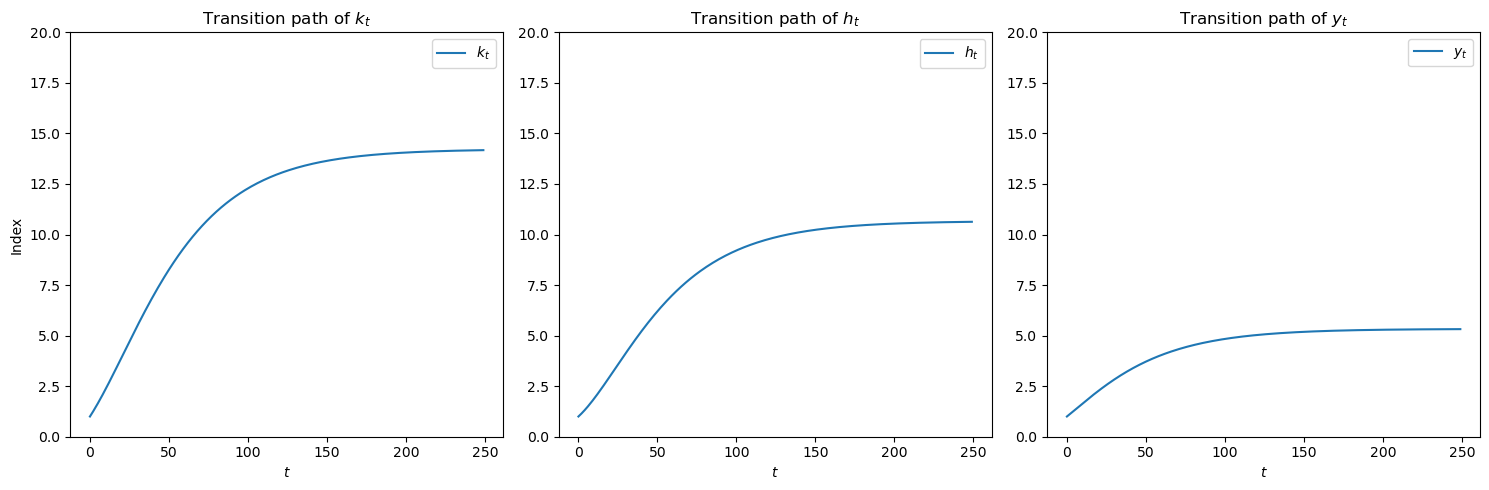

In [88]:
# Plot the transition paths
kt_tilde, ht_tilde, yt_tilde = model.simulate_transition_path()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(kt_tilde[:250], label='$k_t$')
axes[0].set_xlabel('$t$')
axes[0].set_ylabel('Index')
axes[0].set_title('Transition path of $k_t$')
axes[0].legend()

axes[1].plot(ht_tilde[:250], label='$h_t$')
axes[1].set_xlabel('$t$')
axes[1].set_title('Transition path of $h_t$')
axes[1].legend()

axes[2].plot(yt_tilde[:250], label='$y_t$')
axes[2].set_xlabel('$t$')
axes[2].set_title('Transition path of $y_t$')
axes[2].legend()

# Set the same y-axis limits for all subplots
y_min = 0
y_max = 20
for ax in axes:
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


Here it can be seen, that $\tilde k$, $\tilde h$ and $\tilde y$ converge towards the steady state value relativly quickly as it is close already at about 150 periods.

We are interested in observing the effects on $\tilde{k}$, $\tilde{h}$, and $\tilde{y}$ when there is an exogenous shock to the savings rate in human capital, denoted as $s_H$. This can be interpreted as the government's decision to increase investment in education.

To simulate this scenario, we begin from the steady state and then modify the parameter $s_H$. We achieve this by running the simulation for 750 periods to reach the steady state. Subsequently, we change the parameter $s_H$ from 0.15 to 0.20, making $s_H = s_K$.

Next, we plot the new simulated transition path from period 700 to 1000:

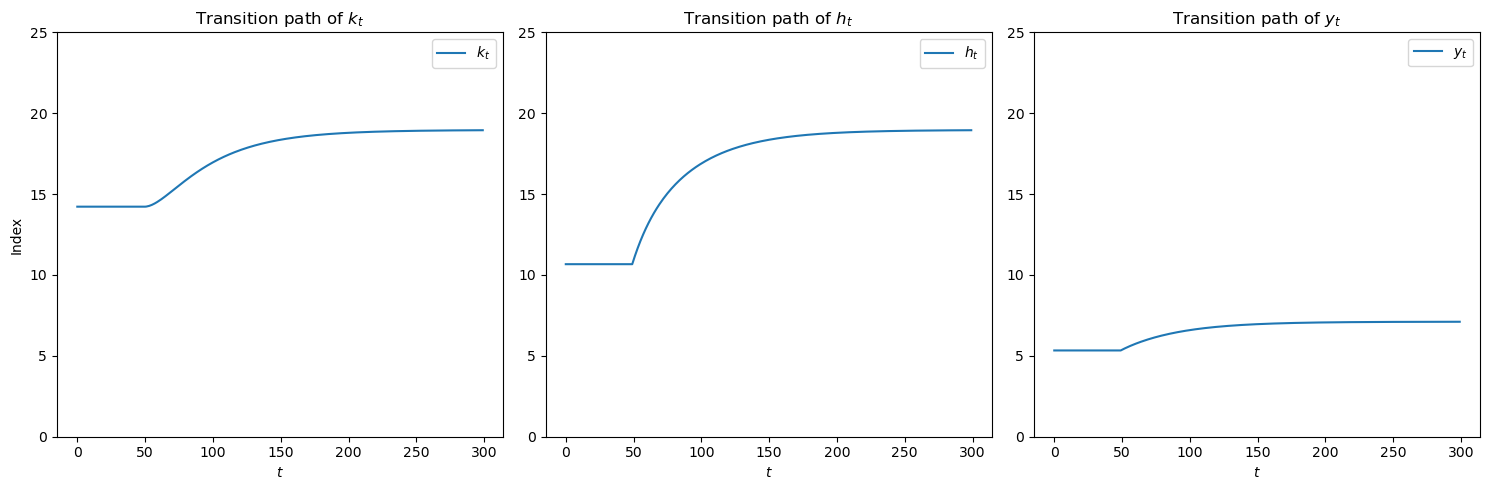

In [89]:
# Plot the transition paths
kn_tilde, hn_tilde, yn_tilde = model.simulate_steady_state_shock()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(kn_tilde[700:], label='$k_t$')
axes[0].set_xlabel('$t$')
axes[0].set_ylabel('Index')
axes[0].set_title('Transition path of $k_t$')
axes[0].legend()

axes[1].plot(hn_tilde[700:], label='$h_t$')
axes[1].set_xlabel('$t$')
axes[1].set_title('Transition path of $h_t$')
axes[1].legend()

axes[2].plot(yn_tilde[700:], label='$y_t$')
axes[2].set_xlabel('$t$')
axes[2].set_title('Transition path of $y_t$')
axes[2].legend()

# Set the same y-axis limits for all subplots
y_min = 0
y_max = 25
for ax in axes:
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


From this, two things are apparent:

1. $\tilde{k}^*$, $\tilde{h}^*$, and $\tilde{y}^*$ increase when $s_H$ is increased from 0.15 to 0.20.

2. Considering that $\alpha = \varphi = 1/3$ and $s_H = s_K$, the new steady state indicates that $\tilde{k}^* = \tilde{h}^*$, implying that the stock of human and physical capital is equal.

# Further analysis - Optimal savings rates

As one of the purposes of this model is to examine how changes in the savings rates of human and physical capital affect the long-term output of the economy. We will observe how modifications to the parameters $s_K$ and $s_H$ influence the steady-state value of $\tilde{y}$.

Initially, we will demonstrate the impact on the steady state of $\tilde{y}$ when only altering one of the two savings rates while keeping the other constant.

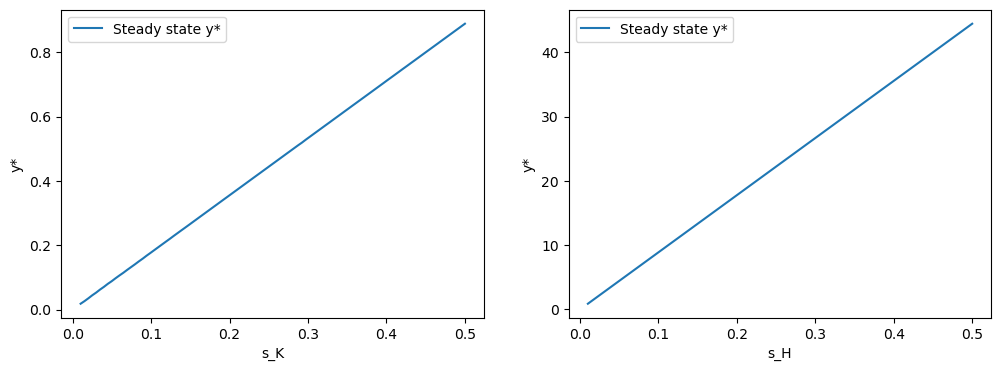

In [94]:
# Define range of s_K and s_H values
s_K_values = np.linspace(0.01, 0.5, 100)
s_H_values = np.linspace(0.01, 0.5, 100)

# Create arrays to store steady state y values
ss_y_s_K = np.zeros_like(s_K_values)
ss_y_s_H = np.zeros_like(s_H_values)

# Calculate steady state y for each value of s_K
for i, s_K in enumerate(s_K_values):
    model.par.s_K = s_K  # Set s_K value
    _, _, ss_y = model.find_steady_state(do_print=False)
    ss_y_s_K[i] = ss_y

# Calculate steady state y for each value of s_H
for i, s_H in enumerate(s_H_values):
    model.par.s_H = s_H  # Set s_H value
    _, _, ss_y = model.find_steady_state(do_print=False)
    ss_y_s_H[i] = ss_y

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(s_K_values, ss_y_s_K, label='Steady state y*')
ax[0].set_xlabel('s_K')
ax[0].set_ylabel('y*')
ax[0].legend()

ax[1].plot(s_H_values, ss_y_s_H, label='Steady state y*')
ax[1].set_xlabel('s_H')
ax[1].set_ylabel('y*')
ax[1].legend()

plt.show()


It is evident that the steady-state level increases in both savings rates when holding the other constant.

However, since $\tilde{y}^*$ depends on both $s_H$ and $s_K$, we want to examine how it is affected when both savings rates are varied simultaneously.

It is important to keep in mind the constraints of $s_H$ and $s_K$, which are that $s_H, s_K \in [0,1]$ and $s_H + s_K \leq 1$.

To accomplish this, we will plot $\tilde{y}^*$ against all possible values of $s_H$ and $s_K$ in an interactive 3D plot.

In [91]:
# Define range of s_K and s_H values
s_K_values = np.linspace(0.01, 1, 100)
s_H_values = np.linspace(0.01, 1, 100)

# Create empty arrays to store results
ss_k_values = np.zeros((len(s_K_values), len(s_H_values)))
ss_h_values = np.zeros((len(s_K_values), len(s_H_values)))
ss_y_values = np.zeros((len(s_K_values), len(s_H_values)))

# Loop through s_K and s_H values and calculate steady state values
for i, s_K in enumerate(s_K_values):
    for j, s_H in enumerate(s_H_values):
        if s_H + s_K > 1:
            continue
        
        model.par.s_K = s_K  # Set s_K value
        model.par.s_H = s_H  # Set s_H value
        ss_k, ss_h, ss_y = model.find_steady_state(do_print=False)
        ss_k_values[i,j] = ss_k  # Replace with the appropriate steady state value of capital
        ss_h_values[i,j] = ss_h  # Replace with the appropriate steady state value of labor
        ss_y_values[i,j] = ss_y

# Create meshgrid of s_K and s_H values
s_K_mesh, s_H_mesh = np.meshgrid(s_K_values, s_H_values)

# Create interactive 3D plot of steady state values
fig = go.Figure(data=go.Surface(x=s_K_mesh, y=s_H_mesh, z=ss_y_values, colorscale='Blues'))
fig.update_layout(
    scene=dict(
        xaxis_title='s_K',
        yaxis_title='s_H',
        zaxis_title='Steady State Value of Y',
        camera=dict(
            eye=dict(x=-1.5, y=-1.5, z=1)
        )
    )
)
fig.show()

From this analysis, it becomes evident that there is a compelling rationale for setting the two savings rates equal to each other. There is no benefit to investing more in one form of capital over the other. Optimal investment entails an equal allocation of resources to both.

This conclusion is readily apparent due to the parameters $\alpha$ and $\varphi$, both of which are set to 1/3. These parameters represent the marginal products of human capital and physical capital, respectively. Since these values are equal, it follows that the savings rates should also be equal.

However, determining the optimal savings rates requires further consideration. The previous analysis suggests that setting $\alpha = \varphi = 0.5$ would maximize steady-state production, $\tilde{y}^*$. However, the economic planner or government should arguably not solely aim to maximize production but also consider consumption. Having savings rates of $\alpha = \varphi = 0.5$ would imply that 100% of income is invested, leaving no income available for consumption.

Therefore, the optimal savings rates should strike a balance between saving for future production and maximizing consumption, ensuring that sufficient income is allocated for both purposes.

The savings rates that maximize steady-state consumption, according to the golden rule, are $s_K = \alpha$ and $s_H = \varphi$. In the context of this model, both of these rates should be equal to 1/3, based on the specified parameters.

Let us examine this using the method outlined above, but focusing on the impact on consumption instead:

To investigate the effect on steady-state consumption, we will plot the steady-state consumption level, $\tilde{c}^*$, (Where $\tilde{c} = (1- \alpha - \varphi)*\tilde{y}$), against all possible values of $s_H$ and $s_K$ in an interactive 3D plot. This will allow us to identify the combination of savings rates that maximizes steady-state consumption, providing insights into the optimal allocation of resources.

In [92]:
# Define range of s_K and s_H values
s_K_values = np.linspace(0.01, 1, 100)
s_H_values = np.linspace(0.01, 1, 100)

# Create empty arrays to store results
ss_k_values = np.zeros((len(s_K_values), len(s_H_values)))
ss_h_values = np.zeros((len(s_K_values), len(s_H_values)))
ss_c_values = np.zeros((len(s_K_values), len(s_H_values)))

# Loop through s_K and s_H values and calculate steady state values
for i, s_K in enumerate(s_K_values):
    for j, s_H in enumerate(s_H_values):
        if s_H + s_K > 1:
            continue
        
        model.par.s_K = s_K  # Set s_K value
        model.par.s_H = s_H  # Set s_H value
        ss_k, ss_h, ss_y, ss_c = model.steady_state_consumption()
        ss_k_values[i,j] = ss_k  # Replace with the appropriate steady state value of capital
        ss_h_values[i,j] = ss_h  # Replace with the appropriate steady state value of labor
        ss_c_values[i,j] = ss_c

# Create meshgrid of s_K and s_H values
s_K_mesh, s_H_mesh = np.meshgrid(s_K_values, s_H_values)

# Create interactive 3D plot of steady state values
fig = go.Figure(data=go.Surface(x=s_K_mesh, y=s_H_mesh, z=ss_c_values, colorscale='Blues'))
fig.update_layout(
    scene=dict(
        xaxis_title='s_K',
        yaxis_title='s_H',
        zaxis_title='Steady State Value of consumption',
        camera=dict(
            eye=dict(x=-1.5, y=-1.5, z=1)
        )
    )
)
fig.show()

Upon examining the graph above, it is evident that the savings rates that maximize steady-state consumption are $s_K = \alpha = s_H = \varphi = 1/3$. This finding further confirms the validity of the golden rule.

Consequently, this implies that if the economic planner or government possesses complete control over the savings rates, it would be optimal for them to set both savings rates to 1/3. This approach would facilitate the maximization of steady-state consumption, ensuring an optimal allocation of resources for long-term economic health and well-being.

Finally, we extract the savings rates that correspond to the maximum steady-state consumption from the graph, in order to confirm our interpretation.

In [93]:
# Find the indices of the maximum steady state consumption
max_ss_c_indices = np.unravel_index(np.argmax(ss_c_values), ss_c_values.shape)

# Extract the corresponding savings rates
max_s_K = s_K_values[max_ss_c_indices[0]]
max_s_H = s_H_values[max_ss_c_indices[1]]

# Print the savings rates that maximize steady state consumption
print(f"The savings rates that maximize steady state consumption are s_K = {max_s_K:.2f} and s_H = {max_s_H:.2f}")

The savings rates that maximize steady state consumption are s_K = 0.33 and s_H = 0.33


Thus, it is demonstrated that the golden rule savings rates hold true for our model.

# Conclusion

In this Python project, a Solow model with human capital accumulation has been analyzed. .

The model is encapsulated in a class called HumanCapitalSolowModelClass, which has methods for numerical finding the steady state, simulating the transition path, simulating the effect of a permanent increase in the savings rate for human capital, and finding the steady state consumption.

The model is solved using numerical methods, specifically the optimize.root function from scipy using the method broyden1 method. 

Overall, this Python project provides an implementation and analysis of the Solow model with human capital accumulation, demonstrating the effects of different savings rates on economic steady state values.


Through the implementation of the model, several key findings were obtained:

1. Increasing both savings rates ($s_K$ and $s_H$) leads to higher steady state income, $\tilde{y}^*$. 

2. When $\alpha$ and $\varphi$ are equal, it is optimal to have equal savings rates ($s_K$ = $s_H$). This balanced allocation of savings between physical and human capital ensures an efficient use of resources and maximizes growth potential.

3. The optimal savings rates for maximizing steady state consumption are when $s_K = \alpha$ and $s_H = \varphi$. Aligning the savings rates with the respective productivity parameters of physical and human capital promotes optimal investment.

Overall, this project contributes to the understanding of how investments in physical and human capital interact to shape long-term economic well being in the context of the Solow model. The implementation and analysis of the model offer valuable insights into the dynamics and implications of these factors for economic development.
    